In [ ]:
! git clone --depth 1 https://github.com/GoogleCloudPlatform/cloudml-samples

Cloning into 'cloudml-samples'...
remote: Enumerating objects: 595, done.
remote: Counting objects: 100% (595/595), done.
remote: Compressing objects: 100% (461/461), done.
remote: Total 595 (delta 163), reused 326 (delta 87), pack-reused 0
Receiving objects: 100% (595/595), 23.26 MiB | 22.43 MiB/s, done.
Resolving deltas: 100% (163/163), done.


In [ ]:
%cd cloudml-samples/census/tf-keras

/content/cloudml-samples/census/tf-keras


In [ ]:
! ls -pR


.:
hptuning_config.yaml  README.md  requirements.txt  scripts/  trainer/

./scripts:
train-local.sh

./trainer:
__init__.py  model.py  task.py	util.py


In [ ]:
! pip install -r requirements.txt

     |████████████████████████████████| 110.5MB 38kB/s 
     |████████████████████████████████| 512kB 45.1MB/s 
     |████████████████████████████████| 51kB 8.7MB/s 
     |████████████████████████████████| 3.8MB 47.8MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=6782f6c31eacf539e5d8f761bbd98921e21a402c67d96fa723a1eda479b7fc88
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 1.15.5 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.5 which is incompatible.
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully unin

In [ ]:
!pip install --upgrade tensorflow

# For a specific version:
!pip install tensorflow==2.0.1

     |████████████████████████████████| 394.3MB 42kB/s 
     |████████████████████████████████| 10.6MB 48.5MB/s 
     |████████████████████████████████| 471kB 55.6MB/s 
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: gast 0.2.2
    Uninstalling gast-0.2.2:
      Successfully uninstalled gast-0.2.2
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.5
    Uninstalling tensorflow-1.15.5:
      Successfully uninstalled tensorflow-1.15.5
     |████████████████████████████████| 86.3MB 41kB/s 
Processing /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd/gast-0.2.2-cp36-none-any.whl
     |████████████████████████████████| 450kB 52.3MB/s 
     |████████████████████████████████| 3.8MB 54

In [ ]:
!pip install keras==2.3.1

     |████████████████████████████████| 378kB 16.0MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [ ]:
#Nous avons importé le modèle pré entrainé vgg16 à l’aide de la bibliothèque keras
#from tensorflow.python.keras_applications import vgg16
import keras
from keras.applications import vgg16
#from tensorflow.keras.applications.vgg16 import vgg16
from keras.applications.vgg16 import VGG16
conv_base=vgg16.VGG16(weights='imagenet',include_top=False,input_shape=(100,100,3))

Using TensorFlow backend.


58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [ ]:
import os
import numpy as np
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow.python.keras import models
from tensorflow.python.keras import layers
from tensorflow.keras.models import Sequential
from keras.applications import VGG16
from keras import models
from keras import layers
#from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dropout

model = models.Sequential()
#model =tensorflow.keras.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(131, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1179904   
_________________________________________________________________
dense_2 (Dense)              (None, 131)               33667     
Total params: 15,928,259
Trainable params: 15,928,259
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -uq "/content/drive/MyDrive/Training" -d "/content"
!unzip -uq "/content/drive/MyDrive/Test" -d "/content"

In [ ]:
train_dir='/content/Training'

In [ ]:
validation_dir='/content/Test'

In [ ]:
#from tensorflow.python.keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, BatchNormalization
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
from keras.optimizers import adam
model.compile(loss='categorical_crossentropy',optimizer=adam(lr=1e-4),metrics=['categorical_accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(100, 100),
        batch_size=32)

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(100, 100),
        batch_size=32, shuffle=False)

history = model.fit_generator(
      train_generator,
      steps_per_epoch=60,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.
Epoch 1/30
60/60 [==============================] - 860s 14s/step - loss: 4.8449 - categorical_accuracy: 0.0198 - val_loss: 4.5963 - val_categorical_accuracy: 0.0000e+00
Epoch 2/30
60/60 [==============================] - 862s 14s/step - loss: 4.5867 - categorical_accuracy: 0.0432 - val_loss: 6.7475 - val_categorical_accuracy: 0.0000e+00
Epoch 3/30
60/60 [==============================] - 860s 14s/step - loss: 4.0332 - categorical_accuracy: 0.1000 - val_loss: 4.7146 - val_categorical_accuracy: 0.3369
Epoch 4/30
60/60 [==============================] - 860s 14s/step - loss: 3.3592 - categorical_accuracy: 0.1974 - val_loss: 5.0789 - val_categorical_accuracy: 0.3250
Epoch 5/30
60/60 [==============================] - 872s 15s/step - loss: 2.5809 - categorical_accuracy: 0.3156 - val_loss: 2.5187 - val_categorical_accuracy: 0.6631
Epoch 6/30
60/60 [==============================] - 868s 14s/step - loss

In [ ]:
import matplotlib.pyplot as plt

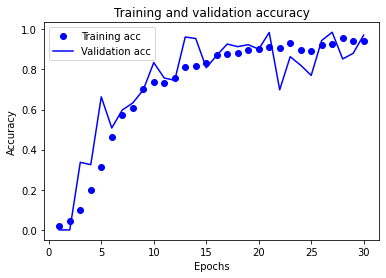

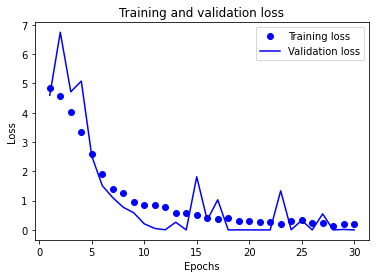

In [ ]:
acc=history.history['categorical_accuracy']
val_acc=model.history.history['val_categorical_accuracy']
loss=model.history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('fruit_image_classification_using vgg16_transfer learning_data augmentation4a',format='png')
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('fruit_image_classification_using vgg16_transfer learning_data augmentation4b',format='png')
plt.show()

In [ ]:
steps_test=12132/32

In [ ]:
print(steps_test)

379.125


In [ ]:
result = model.evaluate_generator(validation_generator, steps=steps_test)
print("Test-set classification accuracy: {0:.2%}".format(result[1]))

Test-set classification accuracy: 94.82%
